In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
def getData(files):
    f = open("data/"+str(files), "r")
    f1 = f.readlines()
    del f1[0:2]
    a = np.asarray(f1)
    table = []
    for i in range(0, len(a)):
        b = a[i][0:-1].split('\t')
        c = map(float, b[0:6])
        d = np.asarray(c)
        table.append(d)
    table = np.asarray(table)
    pd.set_option('display.float_format', lambda x: '%.6e' % x)
    df = pd.DataFrame(table, columns=['dt', 'v1', 'w1', 'v2', 'w2'])
    return df

In [8]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [3]:
df = getData('MUO_DigitizerEfficiency.dat')

In [4]:
print min(df['dt']), max(df['dt'])

1.004e-06 3.9624e-05


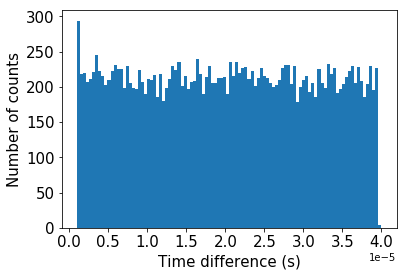

In [36]:
plt.hist(df['dt'], bins=100, range=(1e-6, 4e-5))
plt.xlabel('Time difference (s)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Number of counts', fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

dt > 0.00000139 20856  fraction kept: 98.6
dt < 0.00000139 294  fraction kept: 1.4


(array([294.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([1.000e-06, 1.390e-06, 1.780e-06, 2.170e-06, 2.560e-06, 2.950e-06,
        3.340e-06, 3.730e-06, 4.120e-06, 4.510e-06, 4.900e-06, 5.290e-06,
        5.680e-06, 6.070e-06, 6.460e-06, 6.850e-06, 7.240e-06, 7.630e-06,
        8.020e-06, 8.410e-06, 8.800e-06, 9.190e-06, 9.580e-06, 9.970e-06,
        1.036e-05, 1.0

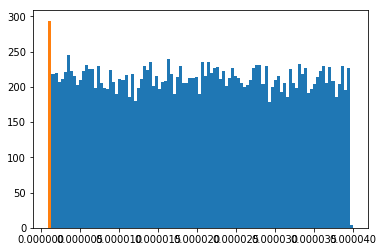

In [64]:
df_good = applyCut(df, 'dt > 0.00000139', 'dt > 0.00000139')
df_bad = applyCut(df, 'dt < 0.00000139', 'dt < 0.00000139')
plt.hist(df_good['dt'], bins=100, range=(1e-6, 4e-5))
plt.hist(df_bad['dt'], bins=100, range=(1e-6, 4e-5))

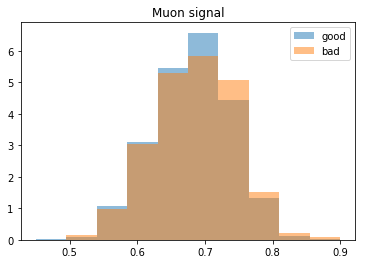

In [69]:
plt.hist(df_good['v1'], range=(0.45, 0.9), label='good', alpha=0.5, normed=True)
plt.hist(df_bad['v1'], range=(0.45, 0.9), label='bad', alpha=0.5, normed=True)
plt.title('Muon signal')
plt.legend()

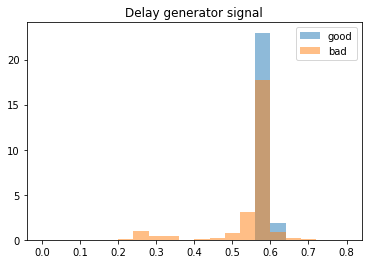

In [76]:
plt.hist(df_good['v2'], bins=20, range=(0,0.8), label='good', alpha=0.5, normed=True)
plt.hist(df_bad['v2'], bins=20, range=(0,0.8), label='bad', alpha=0.5, normed=True)
plt.title('Delay generator signal')
plt.legend()

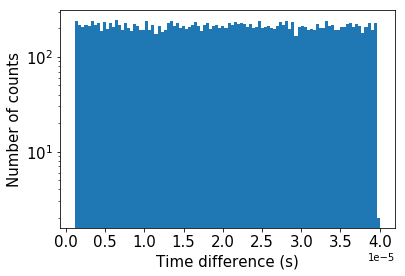

In [34]:
plt.hist(df['dt'], bins=100, range=(1.2e-6, 4e-5))
plt.xlabel('Time difference (s)', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Number of counts', fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.yscale('log')